In [1]:
import numpy as np
import sklearn.cross_validation
import sklearn.metrics

#import autosklearn.classification

In [2]:
X_data = np.genfromtxt('files/x_train.csv', delimiter=';')
Y_data = np.genfromtxt('files/y_train.csv', delimiter=';')

In [8]:
X_final = np.genfromtxt('files/x_test.csv', delimiter=';')
X_final = X_final[1:]

In [3]:
X_data = X_data[1:]

In [4]:
print(X_data.shape)
print(Y_data.shape)

(25289, 12)
(25289,)


In [5]:
overfit_x_data = X_data[:2000, :]
overfit_y_data = Y_data[:2000]
print(overfit_x_data.shape)
print(overfit_y_data.shape)

(2000, 12)
(2000,)


In [143]:
X_train, X_test, y_train, y_test = \
        sklearn.cross_validation.train_test_split(X_data, Y_data, random_state=1)
oX_train, oX_test, oy_train, oy_test = \
        sklearn.cross_validation.train_test_split(overfit_x_data, overfit_y_data, random_state=1)

In [49]:
y_test.shape

(6323,)

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=3600, per_run_time_limit=600,
    tmp_folder='/tmp/autoslearn_sequential_example_tmp',
    output_folder='/tmp/autosklearn_sequential_example_out',
    # Do not construct ensembles in parallel to avoid using more than one
    # core at a time. The ensemble will be constructed after auto-sklearn
    # finished fitting all machine learning models.
    ensemble_size=0, delete_tmp_folder_after_terminate=False)
automl.fit(X_train, y_train, dataset_name='digits')
# This call to fit_ensemble uses all models trained in the previous call
# to fit to build an ensemble which can be used with automl.predict()
automl.fit_ensemble(y_train, ensemble_size=100)

print(automl.show_models())
predictions = automl.predict(X_test)
print(automl.sprint_statistics())
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

f_predictions = automl.predict_proba(X_final)
x_f = f_predictions[:, 1]
x_f

In [125]:
import tensorflow as tf
from keras.models                      import Sequential
from keras.layers                      import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers.normalization        import BatchNormalization
from keras.layers.convolutional        import Convolution1D
from keras.layers.local                import LocallyConnected1D
from keras.layers.pooling              import MaxPooling1D, AveragePooling1D
from keras.layers.advanced_activations import ELU, LeakyReLU, PReLU
from keras.layers.noise                import GaussianNoise

import matplotlib.pyplot as plt

In [144]:
x_tr = sklearn.preprocessing.StandardScaler().fit_transform(X_train)
x_ts = sklearn.preprocessing.StandardScaler().fit_transform(X_test)
x_fn = sklearn.preprocessing.StandardScaler().fit_transform(X_final)

In [141]:
model = Sequential()
model.add(Dense(24, input_shape=(12,)))
model.add(ELU())
model.add(BatchNormalization())
model.add(Dense(512))
model.add(ELU())

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Train on 22254 samples, validate on 3035 samples
Epoch 1/200
2s - loss: 0.4376 - acc: 0.8160 - val_loss: 0.4183 - val_acc: 0.8053
Epoch 2/200
0s - loss: 0.3902 - acc: 0.8279 - val_loss: 0.4095 - val_acc: 0.8142
Epoch 3/200
0s - loss: 0.3879 - acc: 0.8292 - val_loss: 0.4116 - val_acc: 0.8105
Epoch 4/200
0s - loss: 0.3871 - acc: 0.8278 - val_loss: 0.3948 - val_acc: 0.8270
Epoch 5/200
0s - loss: 0.3865 - acc: 0.8285 - val_loss: 0.3965 - val_acc: 0.8250
Epoch 6/200
0s - loss: 0.3864 - acc: 0.8297 - val_loss: 0.3930 - val_acc: 0.8280
Epoch 7/200
0s - loss: 0.3859 - acc: 0.8292 - val_loss: 0.3960 - val_acc: 0.8244
Epoch 8/200
0s - loss: 0.3866 - acc: 0.8279 - val_loss: 0.3934 - val_acc: 0.8280
Epoch 9/200
0s - loss: 0.3864 - acc: 0.8287 - val_loss: 0.3932 - val_acc: 0.8244
Epoch 10/200
0s - loss: 0.3842 - acc: 0.8307 - val_loss: 0.3899 - val_acc: 0.8287
Epoch 11/200
0s - loss: 0.3850 - acc: 0.8296 - val_loss: 0.3946 - val_acc: 0.8277
Epoch 12/200
0s - loss: 0.3844 - acc: 0.8305 - val_loss: 0

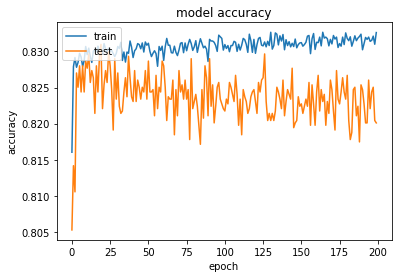

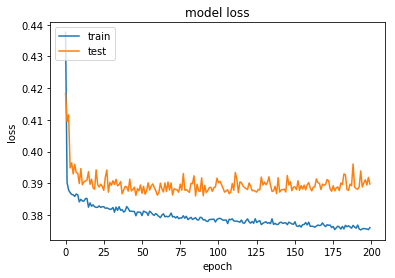

In [142]:
batch_size = 512
nb_epoch = 200

history = model.fit(x_tr, y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              verbose=2,
              validation_data=(x_ts, y_test))

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [148]:
model = Sequential()
model.add(Dense(24, input_shape=(12,)))
model.add(ELU())
model.add(BatchNormalization())
model.add(Dense(144))
model.add(ELU())
model.add(GaussianNoise(0.7))
model.add(Reshape((12, 12)))
model.add(Convolution1D(8, 1, border_mode='same'))
model.add(ELU())
model.add(GaussianNoise(0.8))
model.add(MaxPooling1D())
model.add(BatchNormalization())
model.add(Convolution1D(16, 1, border_mode='same'))
model.add(ELU())
model.add(GaussianNoise(0.9))
model.add(AveragePooling1D())
#model.add(BatchNormalization())
model.add(Convolution1D(32, 3))
model.add(ELU())
model.add(Flatten())
model.add(Dense(64))
model.add(ELU())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Train on 18966 samples, validate on 6323 samples
Epoch 1/100
2s - loss: 0.5917 - acc: 0.6988 - val_loss: 0.4224 - val_acc: 0.8099
Epoch 2/100
0s - loss: 0.4337 - acc: 0.8070 - val_loss: 0.4077 - val_acc: 0.8194
Epoch 3/100
0s - loss: 0.4124 - acc: 0.8213 - val_loss: 0.4036 - val_acc: 0.8227
Epoch 4/100
0s - loss: 0.4045 - acc: 0.8242 - val_loss: 0.4016 - val_acc: 0.8246
Epoch 5/100
0s - loss: 0.3992 - acc: 0.8246 - val_loss: 0.3977 - val_acc: 0.8248
Epoch 6/100
0s - loss: 0.3972 - acc: 0.8264 - val_loss: 0.3976 - val_acc: 0.8248
Epoch 7/100
0s - loss: 0.3949 - acc: 0.8293 - val_loss: 0.3978 - val_acc: 0.8232
Epoch 8/100
0s - loss: 0.3954 - acc: 0.8269 - val_loss: 0.3943 - val_acc: 0.8245
Epoch 9/100
0s - loss: 0.3939 - acc: 0.8291 - val_loss: 0.3958 - val_acc: 0.8216
Epoch 10/100
0s - loss: 0.3918 - acc: 0.8294 - val_loss: 0.3936 - val_acc: 0.8248
Epoch 11/100
0s - loss: 0.3917 - acc: 0.8287 - val_loss: 0.3936 - val_acc: 0.8235
Epoch 12/100
0s - loss: 0.3913 - acc: 0.8284 - val_loss: 0

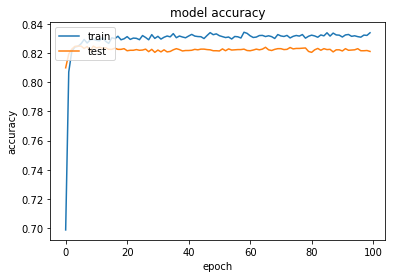

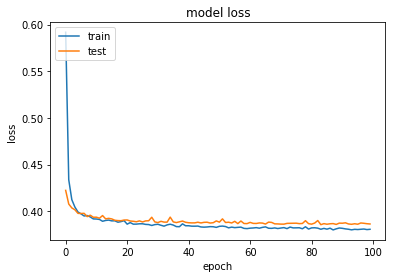

In [149]:
batch_size = 512
nb_epoch = 100

history = model.fit(x_tr, y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              verbose=2,
              validation_data=(x_ts, y_test))

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [150]:
res = model.predict(x_fn)
res

array([[ 0.12607498],
       [ 0.03295291],
       [ 0.60453576],
       ..., 
       [ 0.05337684],
       [ 0.17851478],
       [ 0.01848183]], dtype=float32)

In [161]:
fin = np.array(res.flatten(), dtype=str)
with open('result.txt',"w") as f:
    f.write("\n".join(fin))